<a href="https://colab.research.google.com/github/josware/mcc_tareas/blob/master/%5BJOS%5D_vgg_Tarea_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tópicos Selectosa de Inteligencia Artificial: Deep Learning**
## **Tarea: Transfer Learning – Covid-19**

---
#### A00354512 Josue Emanuel Gómez Carrillo
#### A00540988 Luis Francisco González Rodríguez
#### A00354860 Anna Karen Casillas Garcia

---

* Descarga las siguientes imágenes de radiografías de torax de personas quee fueron detectadas positivamente con COVID-19. Actualmente no es fácil conseguir una base de datos abierta, pero la siguiente liga nos lleva a la base de datos que está siendo utilizada principalmente a nivel mundial por la comunidad de científicos del área de aprendizaje profundo. Fue recolectada y etiquetada por el Dr. Joseph Paul Cohen (https://josephpcohen.com/w/), uno de los fundadores en 2013 del Institute for Reproducible Research, IRR, (https://reproducibilityinstitute.org/w/). Deberás descargar dicha base de datos y usarla en esta Tarea como el conjunto de imágenes cuya clase está clasificada como positivo para covid19:
https://github.com/ieee8023/COVID-chestxray-dataset/

* Como alternativa para imágenes de radiografías de tórax de personas “normales” se está usando la siguiente base de datos: contiene mucho más imágenes que las de la liga anterior, por lo que deberás decargar la misma cantidad de imágenes de la carpeta llamada “Normal” y usarlas como el conjunto de imágenes clasificadas como covid19 negativo:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

* Se han estado proponiendo arquitecturas muy particulares para este problema. Realiza un breve resumen de la situación actual de esta problemática:
 * European Commission: https://ec.europa.eu/futurium/en/ai-robotics-vs-covid19/covid-19- detector-using-x-ray-images
 * MIT – Technology Review: https://www.technologyreview.es/s/12049/una-nueva-ia-podria- detectar-el-covid-19-en-una-radiografia-de-torax
 * COVID-Net: https://arxiv.org/abs/2003.09871
 * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7187882/

##**Breve resumen de la situación actual de esta problemática**

---


El resumen de la probemática actual puede encontrarse siguiendo la liga al [Documento de Arquitecturas CNN](https://docs.google.com/document/d/143J4s2d9U8Dw3E0-X3E6lUpgshuys22TkdPaII1Gx2o/edit?usp=sharing).


##1. Realiza un breve resumen de cada una de las siguientes arquitecturas CNN: 
 * a. VGG
 * b. ResNet
 * c. Xception
 * d. Inception/GoogleLeNet 
 * e. InceptionResNet
 * f. MobileNet
 * g. DenseNet
 * h. NasNetMobile
 * i. EfficientNet


 El Resumen de cada una de las arquitecturas CNN puede encontrasr en el siguiente link: [Arquitecturas CNN](https://docs.google.com/document/d/143J4s2d9U8Dw3E0-X3E6lUpgshuys22TkdPaII1Gx2o/edit?usp=sharing)

##2. Implementa cada una de las arquitecturas anteriores usando únicamente los pesos pre-entrenados de su bloque convolucional (include_top=False), para el conjunto de imágenes covid19 vs normal. 
Inicia con el modelo más simple cuando existan varias versiones de algunos de ellos. Deberás proponer las capas de salida (layers) que consideres adecuadas en cada caso para el llamado bloque de clasificación. En cada uno de los modelos del problema anterior deberás incluir como mínimo:
* a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.
* b. Resumen de la arquitectura propuesta.
* c. Tamaño de las imágenes de entrada.
* d. Total de pesos del modelo propuesto y tamaño en MB del mismo.
* e. Tiempo de entrenamiento.
* f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.
* g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y
prueba.


#Cargado de imágenes COVID

##Pre-requisito

Para poder ejecutar este proyecto necesitaremos imágenes montadas en tu Google Drive:
1. Descarga el siguiente archivo y descomprime su contenido en Google Drive
https://drive.google.com/open?id=1cI3xqqG4HvZdrtPGWssowI0M1H0LkCVe

2. La estructura de folders debe ser:

```
My Drive/
     ├──xray
          ├── covid/
          └── normal/
```




### 1. Montar Google Drive a la sesión actual

In [ ]:
#Montar Google Drive en la sesion actual
#Google Solicitará permiso para acceder a tu drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/xray.zip"

In [ ]:
#Ubicación de las imágenes
mypath = '/content/xray'
print(mypath)

#Verificar que si esté montado el Drive con el path correcto
!ls '/content/xray'

##Output esperado:
##/content/drive/My Drive/xray
##covid  normal

/content/xray
covid  normal


Instalar la versión más reciente de Tensor Flow en Google Colab

In [ ]:
# To determine which version you're using:
!pip show tensorflow

#!pip install --upgrade tensorflow
!pip install tf-nightly

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: protobuf, tensorboard, wrapt, absl-py, wheel, astunparse, google-pasta, keras-preprocessing, gast, grpcio, tensorflow-estimator, scipy, six, termcolor, h5py, opt-einsum, numpy
Required-by: fancyimpute
     |████████████████████████████████| 525.1MB 28kB/s 
     |████████████████████████████████| 460kB 42.9MB/s 
     |████████████████████████████████| 2.9MB 46.1MB/s 


###2. Creación de Dataset de Imágenes

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

##Variables de imágen
image_size = (224, 224)
batch_size = 32

images_ds = tf.keras.preprocessing.image_dataset_from_directory(
    mypath,
    labels="inferred",
    class_names=['covid', 'normal'],
    color_mode="rgb",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)




Found 878 files belonging to 2 classes.


In [ ]:


model = keras.applications.ResNet50V2(weights=None,input_shape=(224,224,3), classes=2)

AttributeError: ignored

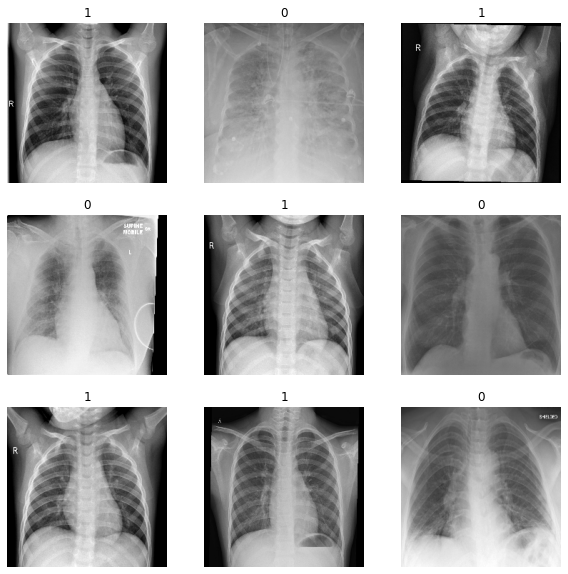

In [ ]:
#Just for fun vamos a mostrar algunos ejemplos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in images_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# 0 COVID
# 1 NORMAL

In [ ]:
#Código en común para el proyecto.
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


#Plot function to be reused to plot model's Accuracy and Loss
def plotAccuLost(model_H, epochs):
  plt.style.use("ggplot")
  #First Plot Training and Validation Accuracy
  plt.figure()
  plt.plot(np.arange(0,epochs),model_H.history["accuracy"],label="train_acc")
  plt.plot(np.arange(0,epochs),model_H.history["val_accuracy"],label="val_acc")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  #Second Plot Training and Validation Lioss
  plt.figure()
  plt.plot(np.arange(0,epochs),model_H.history["loss"],label="train_loss") 
  plt.plot(np.arange(0,epochs),model_H.history["val_loss"],label="val_loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  #Print Plot
  plt.show()


###A. VGG

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.
Model summary

####c. Tamaño de las imágenes de entrada.

224x224x3

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

???


####e. Tiempo de entrenamiento

Resumen de los epochs

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###B. ResNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


In [ ]:
modelo_resnet = tf.keras.applications.ResNet152V2()

242753536/242745792 [==============================] - 5s 0us/step


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###C. Xception


In [ ]:
#Importamos la paqueteríía necesaria.
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, Add, Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D

def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

#Para poder Normalizar el Batch
def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

#Mi flujo de entrada
def entry_flow(x):
    x = conv_bn(x, filters=32, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters=64, kernel_size=3)
    tensor = ReLU()(x)

    x = sep_bn(tensor, filters=128, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=128, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=128, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=256, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=728, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    return x

#El flujo central con las funciones de activación ReLU y llamamos al
#Batch Normalization entre cada función de activación
def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)

        tensor = Add()([tensor, x])

    return tensor

#Definicióón del flujo de salida.
def exit_flow(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=2048, kernel_size=3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    x = Dense(units=1000, activation='softmax')(x)

    return x

#Tamaño de imagenes 224 x 224
input = Input(shape=[224, 224, 3])

#TODO: Agregar las imágenes para el modelo xception

x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

In [ ]:
from tensorflow.keras import Model
#Xception model using the above flow

output = 
xception_model = Model(input, output)
n_batch = 8

#TODO: Aggregar la salida output

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

In [ ]:
#Entrenar modelo e imprimir tiempos
t = time.process_time()
H = xception_model.fit(X_train,Y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=n_batch)
print("elapsed_time = ", time.process_time() - t)

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

In [ ]:
#Resumen númerico de precision modelo Xception
predictions_test = xception_model.predict(x_test, batch_size=n_batch)
print(classification_report(y_test.argmax(axis=1),
      predictions_test.argmax(axis=1),target_names=labels))

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

In [ ]:
#Graficar precicisión del modelo Xception
plotAccuLost(H, n_epochs)

###D. Inception/GoogleLeNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###E. InceptionResNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###F. MobileNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###G. DenseNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

In [ ]:
#Entrenar modelo e imprimir tiempos
t = time.process_time()
H = xception_model.fit(X_train,Y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=n_batch)
print("elapsed_time = ", time.process_time() - t)

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

In [ ]:
#Resumen númerico de precision modelo Xception
predictions_test = xception_model.predict(x_test, batch_size=n_batch)
print(classification_report(y_test.argmax(axis=1),
      predictions_test.argmax(axis=1),target_names=labels))

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

In [ ]:
#Graficar precicisión del modelo Xception
plotAccuLost(H, n_epochs)

###H. NasNetMobile

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

###I. EfficientNet

####a. Resumen de las características principales del modelo: Partición utilizada, método de optimización, tamaño de batches, tasa de aprendizaje, etc.


####b. Resumen de la arquitectura propuesta.

####c. Tamaño de las imágenes de entrada.

####d. Total de pesos del modelo propuesto y tamaño en MB del mismo.

####e. Tiempo de entrenamiento

In [ ]:
#Entrenar modelo e imprimir tiempos
t = time.process_time()
H = xception_model.fit(X_train,Y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=n_batch)
print("elapsed_time = ", time.process_time() - t)

####f. Resumen numérico: precision, recall, f 1-score y matriz de confusión.

In [ ]:
#Resumen númerico de precision modelo Xception
predictions_test = xception_model.predict(x_test, batch_size=n_batch)
print(classification_report(y_test.argmax(axis=1),
      predictions_test.argmax(axis=1),target_names=labels))

####g. Gráficas de la precisión (accuracy) y del error de los conjuntos de entrenamiento y prueba.

In [ ]:
#Graficar precicisión del modelo Xception
plotAccuLost(H, n_epochs)

##3. Resume los resultados obtenidos en el ejercicio anterior en una tabla coparativa e incluye tus conclusiones finales de la actividad.